# Matplotlib Example

Import package and set style.  
To see available styles use: plt.style.available

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('ggplot')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


## Line plots
Using the procedural (MATLAB-like) interface

Text(0.5, 1.0, 'Trigonometric functions')

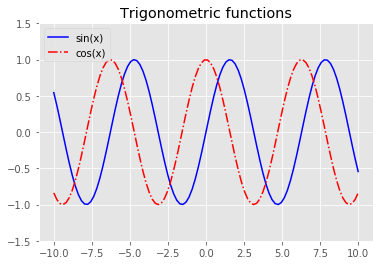

In [3]:
x = np.linspace(-10, 10, 100)
plt.plot(x, np.sin(x), '-b', label='sin(x)')
plt.plot(x, np.cos(x), '-.r', label='cos(x)')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.title('Trigonometric functions')

Using the object-oriented interface

[(-1.5, 1.5), Text(0.5, 1.0, 'Trigonometric functions')]

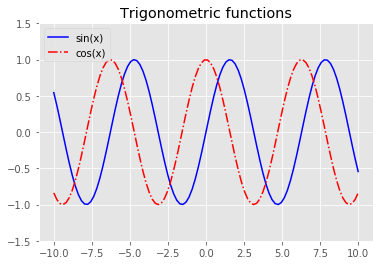

In [4]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-b', label='sin(x)')
ax.plot(x, np.cos(x), '-.r', label='cos(x)')
ax.legend()
ax.set(ylim=[-1.5, 1.5], title='Trigonometric functions')

## Scatter plots
We can use plt.plot for efficiently creating scatter plots

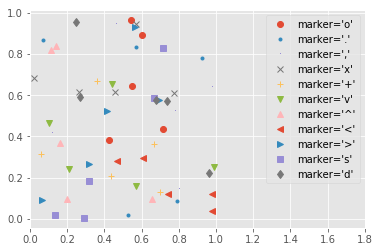

In [5]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0, 1.8)

For customizing individual points, we can use plt.scatter

In [1]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.scatter(rng.rand(5), rng.rand(5), marker=marker, label="marker='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0, 1.8)

NameError: name 'np' is not defined

We set color and size per point, and use alpha and colormaps

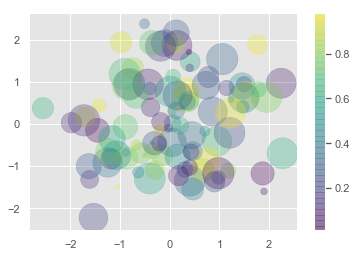

In [25]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); # show color scale

## Error bars
When the aggregation axis is set, the shape of the output is the original shape with the aggregation axis removed

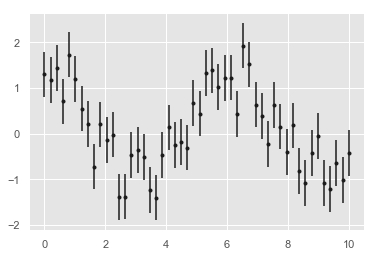

In [26]:
x = np.linspace(0, 10, 50)
dy = 0.5
y = np.cos(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k');

## 1D Histograms
We can also overplot several random variables

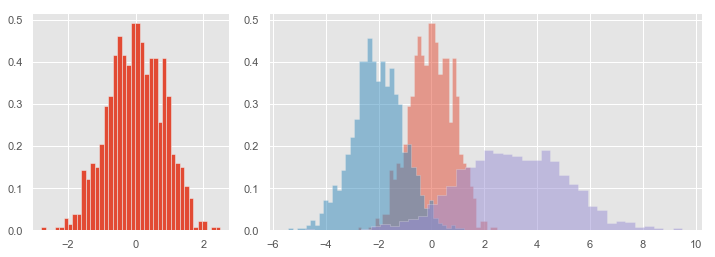

In [27]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

fig = plt.figure(figsize=(12, 4))
grid = plt.GridSpec(1, 3)
plt.subplot(grid[0, 0])
h = plt.hist(x1, bins=40, density=True)

kwargs = dict(histtype='stepfilled', alpha=0.5, density=True, bins=40)
plt.subplot(grid[1:3])
h1 = plt.hist(x1, **kwargs)
h2 = plt.hist(x2, **kwargs)
h3 = plt.hist(x3, **kwargs)


## 2D Histograms

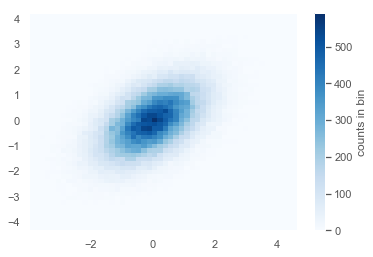

In [28]:
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
x, y = np.random.multivariate_normal(mean, cov, 100000).T
plt.hist2d(x, y, bins=50, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

## Images
We load hand-written digits as 8x8 thumnails from Scikit-Learn.  
Each class contains 8x8 thumnnails. There are 20 classes.

(1797, 64)


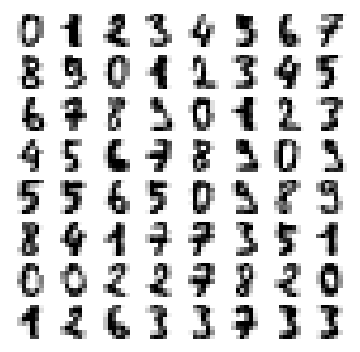

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

## Specialized plots using Seaborn
We import the seaborn package and the classic Fisher iris dataset

In [30]:
import seaborn as sns
sns.set()
iris = sns.load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### Bar plots

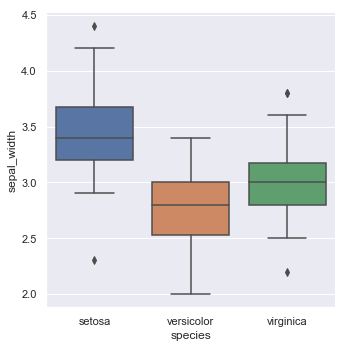

In [31]:
sns.catplot("species", "sepal_width", data=iris, kind='box');

### Pair plots

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


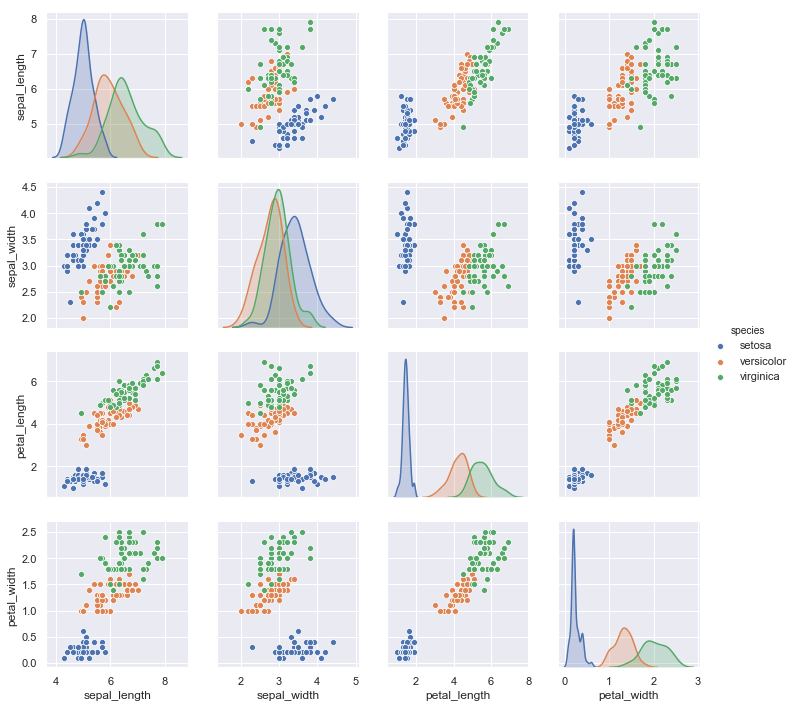

In [32]:
sns.pairplot(iris, hue='species', height=2.5)

### Joint plots

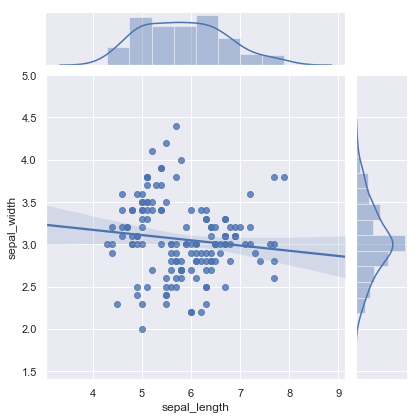

In [33]:
sns.jointplot("sepal_length", "sepal_width", data=iris, kind='reg');